# Task-5: Exploratory-Data-Analysis-Sports

## Abilash B

### Task By: The Spark Foundation

**Objective:**

* Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’

* As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.

* Dataset : matches.csv & deliveries.csv  (https://bit.ly/34SRn3b)

### Importing libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing csv files

In [4]:
mdata = pd.read_csv('matches.csv')
mdata.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
ddata = pd.read_csv('deliveries.csv')
ddata.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


#### Combining both the data from deliveries.csv as well as matches.csv

In [6]:
s_data = mdata[['id', 'season', 'winner']]
complete_data = ddata.merge(s_data, how = 'inner', left_on = 'match_id', right_on = 'id')
complete_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,winner
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,4,0,4,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,2,2,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad


In [7]:
mdata.columns.values

array(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'], dtype=object)

Matches column names

In [8]:
#dropping 3rd umpire values
mdata = mdata.drop(columns = ['umpire3'], axis = 1)
mdata.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [10]:
wins_seasonally = mdata.groupby('season')['winner'].value_counts()
wins_seasonally

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

Counting the wins per season

#### Number of Matches per season

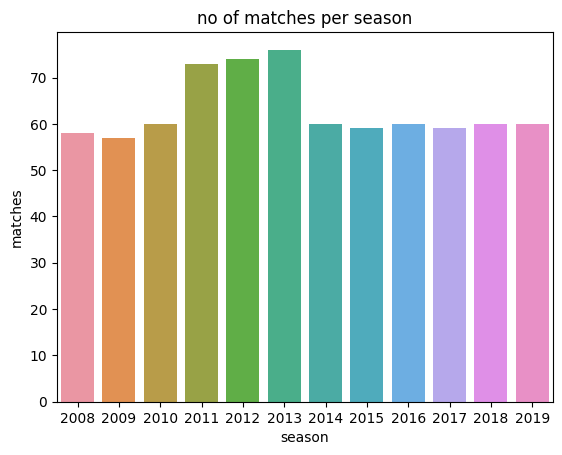

In [11]:
sns.countplot('season', data = mdata)
plt.title("no of matches per season")
plt.xlabel('season')
plt.ylabel('matches')
plt.show()

#### Number of Matches Won by a Team

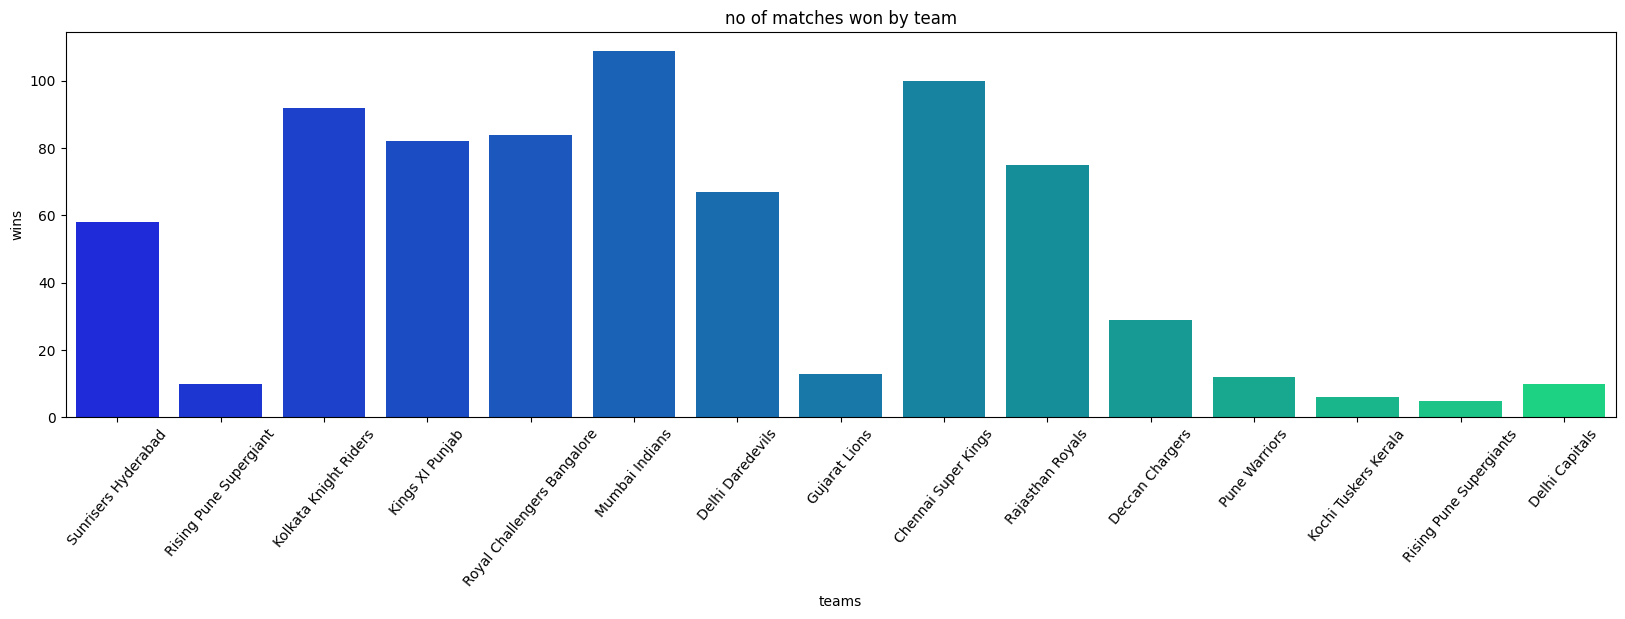

In [12]:
plt.figure(figsize = (20,5))
sns.countplot('winner', data = mdata, palette = 'winter')
plt.title("no of matches won by team")
plt.xticks(rotation = 50)
plt.xlabel('teams')
plt.ylabel('wins')
plt.show()

In [13]:
mdata['win_by'] = np.where(mdata['win_by_runs']>0, 'Bat first', 'Bowl first')

In [14]:
win = mdata.win_by.value_counts()
labels = np.array(win.index)
sizes = win.values

#### Match Result w.r.t batting/bowling

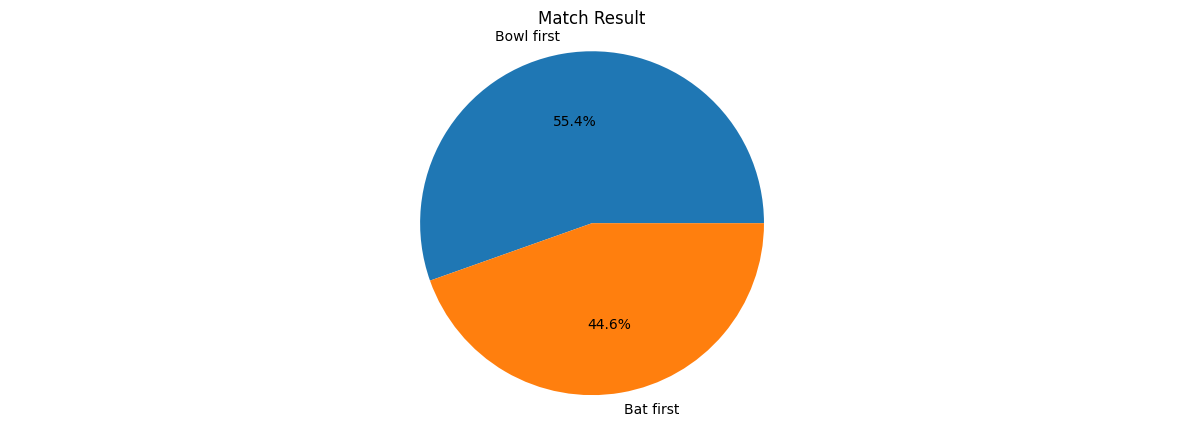

In [15]:
plt.figure(figsize = (15,5))
plt.pie(sizes, labels = labels, autopct = '%1.1f%%')
plt.title('Match Result')
plt.axis('equal')
plt.show()

#### Number of matches won by a team batting/bowling first

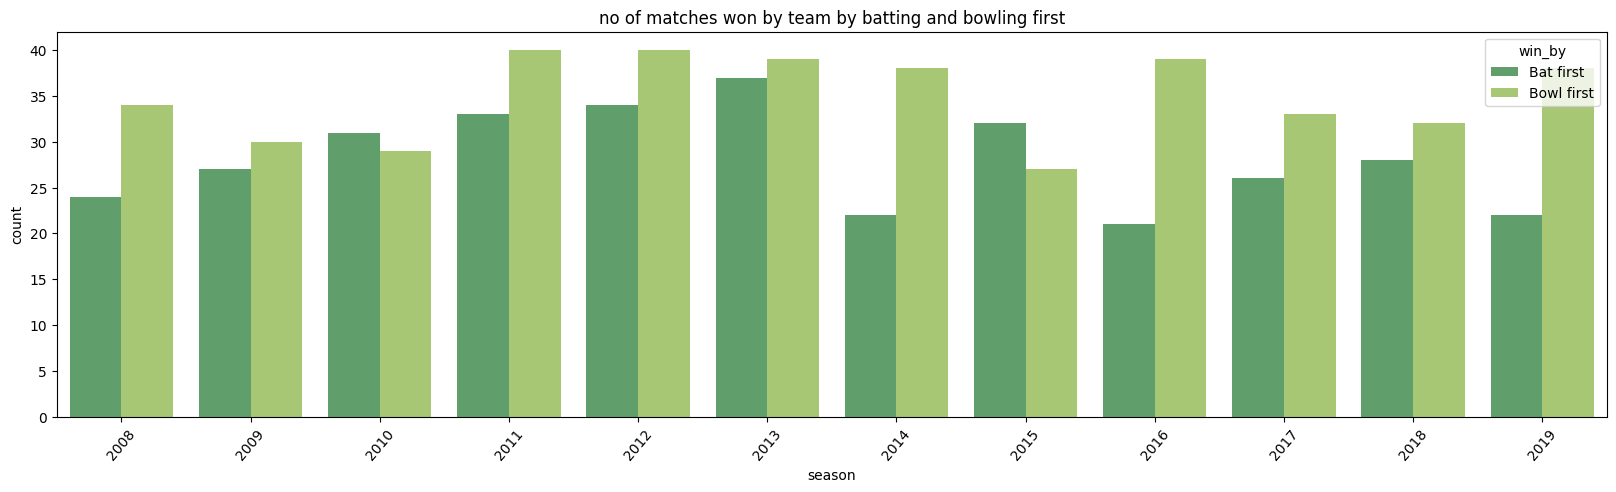

In [16]:
plt.figure(figsize = (20,5))
sns.countplot('season',hue = 'win_by', data = mdata, palette = 'summer')
plt.title("no of matches won by team by batting and bowling first")
plt.xticks(rotation = 50)
plt.xlabel('season')
plt.ylabel('count')
plt.show()

#### Toss Result for batting or fielding

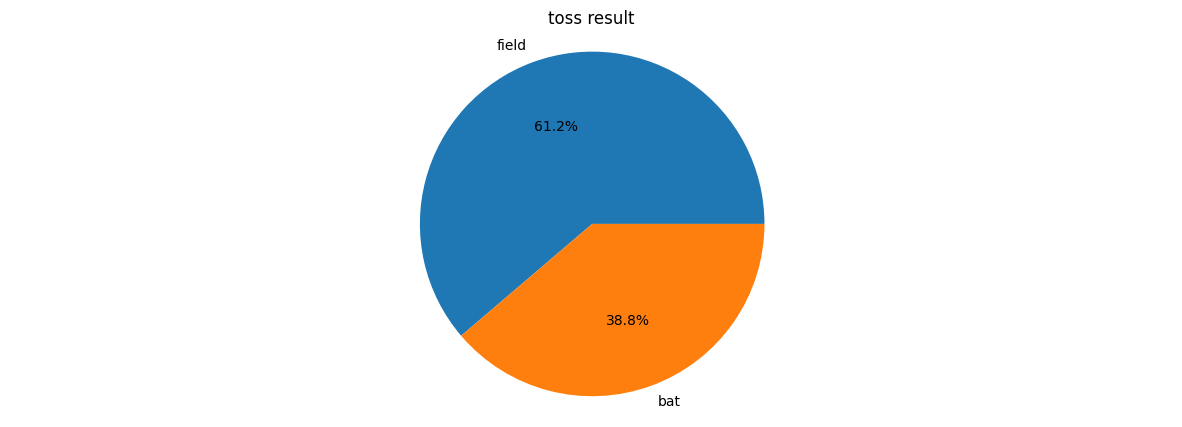

In [17]:
toss = mdata.toss_decision.value_counts()
labels = np.array(toss.index)
sizes = toss.values
plt.figure(figsize = (15,5))
plt.pie(sizes, labels = labels,autopct = '%1.1f%%')
plt.title('toss result')
plt.axis('equal')
plt.show()

#### Number of matches won by team by toss result

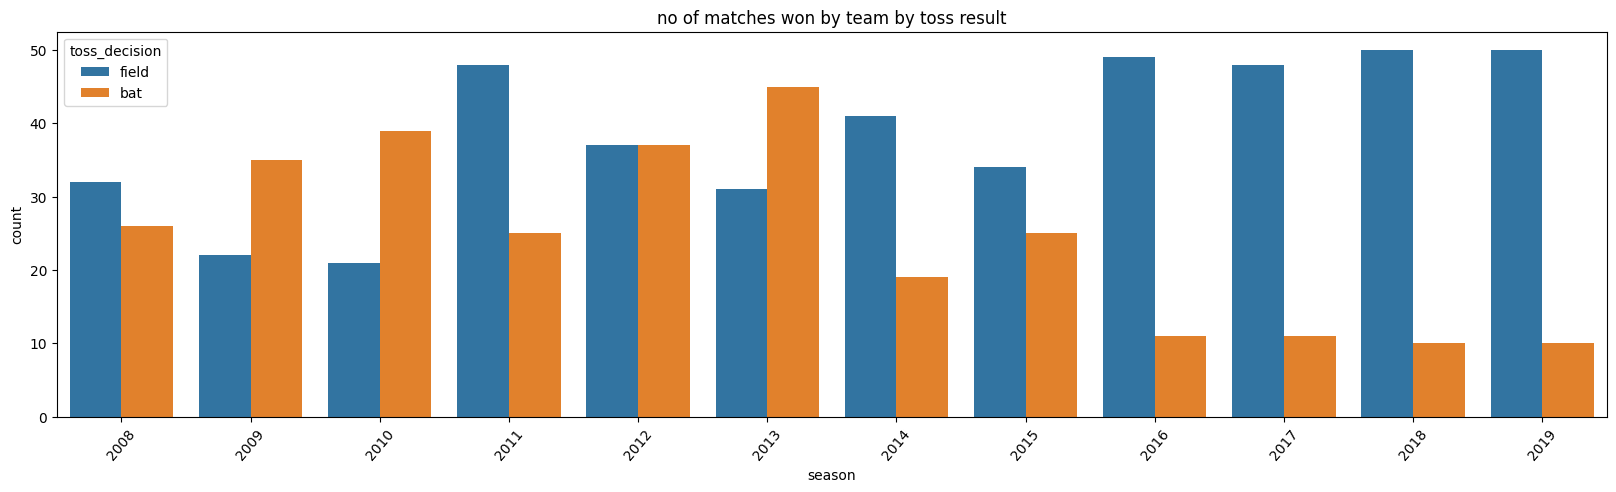

In [18]:
plt.figure(figsize = (20,5))
sns.countplot('season',hue = 'toss_decision', data = mdata)
plt.title("no of matches won by team by toss result")
plt.xticks(rotation = 50)
plt.xlabel('season')
plt.ylabel('count')
plt.show()

### Winners of each season

In [19]:
final_matches = mdata.drop_duplicates(subset = ['season'], keep = 'last')
final_matches[['season','winner']].reset_index(drop = True).sort_values('season') 

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


#### Winning Percentage 

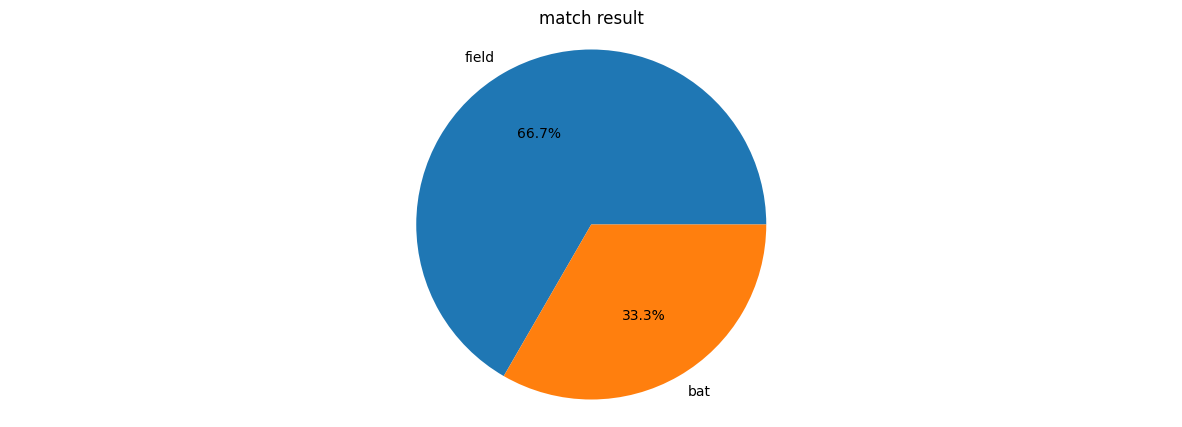

In [20]:
#winning percentage on final
match = final_matches.win_by.value_counts()
labels = np.array(toss.index)
sizes = match.values
plt.figure(figsize = (15,5))
plt.pie(sizes, labels = labels,autopct = '%1.1f%%')
plt.title('match result')
plt.axis('equal')
plt.show()

#### Toss Decision

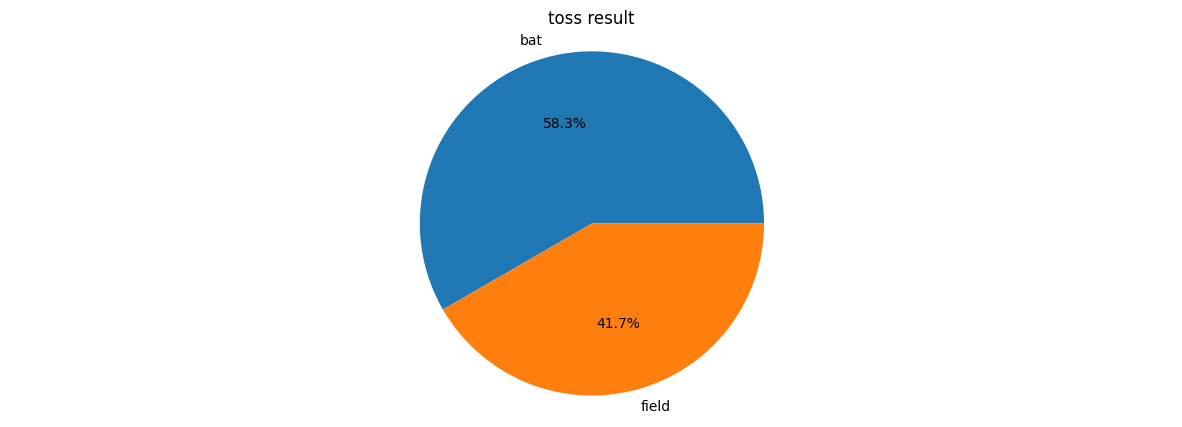

In [21]:
toss = final_matches.toss_decision.value_counts()
labels = np.array(toss.index)
sizes = toss.values
plt.figure(figsize = (15,5))
plt.pie(sizes, labels = labels,autopct = '%1.1f%%')
plt.title('toss result')
plt.axis('equal')
plt.show()

### Top Players of IPL

<Figure size 2000x500 with 0 Axes>

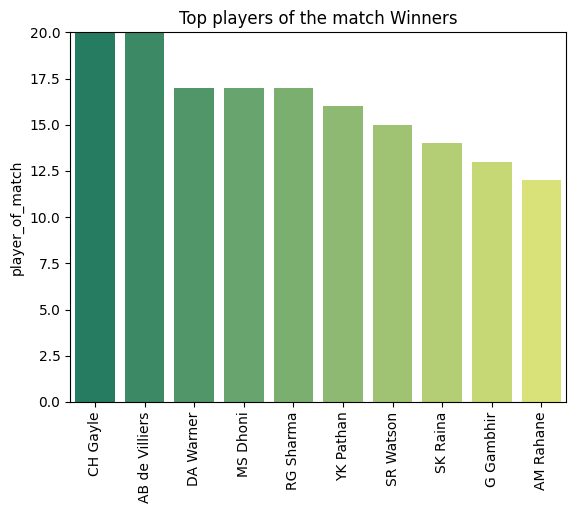

In [22]:
plt.figure(figsize = (20,5))
top_players = mdata.player_of_match.value_counts()[:10]
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top players of the match Winners")
top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v', palette="summer");
plt.show()

In [24]:
final_matches.groupby(['city','winner']).size()

city          winner               
Bangalore     Kolkata Knight Riders    1
              Sunrisers Hyderabad      1
Chennai       Chennai Super Kings      1
              Kolkata Knight Riders    1
Hyderabad     Mumbai Indians           2
Johannesburg  Deccan Chargers          1
Kolkata       Mumbai Indians           2
Mumbai        Chennai Super Kings      2
              Rajasthan Royals         1
dtype: int64

IPL Finals venues and winners along with the number of wins.

In [26]:
final_matches["winner"].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Deccan Chargers          1
Sunrisers Hyderabad      1
Rajasthan Royals         1
Name: winner, dtype: int64

number of season won by teams

In [59]:
final_matches[['toss_winner','toss_decision','winner']].reset_index(drop=True)

,toss_winner,toss_decision,winner
0,Mumbai Indians,bat,Mumbai Indians
1,Rajasthan Royals,field,Rajasthan Royals
2,Royal Challengers Bangalore,field,Deccan Chargers
3,Chennai Super Kings,bat,Chennai Super Kings
4,Chennai Super Kings,bat,Chennai Super Kings
5,Chennai Super Kings,bat,Kolkata Knight Riders
6,Mumbai Indians,bat,Mumbai Indians
7,Kolkata Knight Riders,field,Kolkata Knight Riders
8,Chennai Super Kings,field,Mumbai Indians
9,Sunrisers Hyderabad,bat,Sunrisers Hyderabad


toss winner, toss decision, winner in final matches.

### Man of the match

In [27]:
final_matches[['winner','player_of_match']].reset_index(drop=True)

,winner,player_of_match
0,Mumbai Indians,KH Pandya
1,Rajasthan Royals,YK Pathan
2,Deccan Chargers,A Kumble
3,Chennai Super Kings,SK Raina
4,Chennai Super Kings,M Vijay
5,Kolkata Knight Riders,MS Bisla
6,Mumbai Indians,KA Pollard
7,Kolkata Knight Riders,MK Pandey
8,Mumbai Indians,RG Sharma
9,Sunrisers Hyderabad,BCJ Cutting


In [28]:
len(final_matches[final_matches['toss_winner']==final_matches['winner']]['winner'])

9

####  numbers of fours hit by team

In [30]:
four_data=complete_data[complete_data['batsman_runs']==4]
four_data.groupby('batting_team')['batsman_runs'].agg([('runs by fours','sum'),('fours','count')])

,runs by fours,fours
batting_team,,
Chennai Super Kings,8772,2193
Deccan Chargers,3828,957
Delhi Capitals,968,242
Delhi Daredevils,8632,2158
Gujarat Lions,1840,460
Kings XI Punjab,9832,2458
Kochi Tuskers Kerala,680,170
Kolkata Knight Riders,9736,2434
Mumbai Indians,10352,2588


#### graph on most fours hit by players

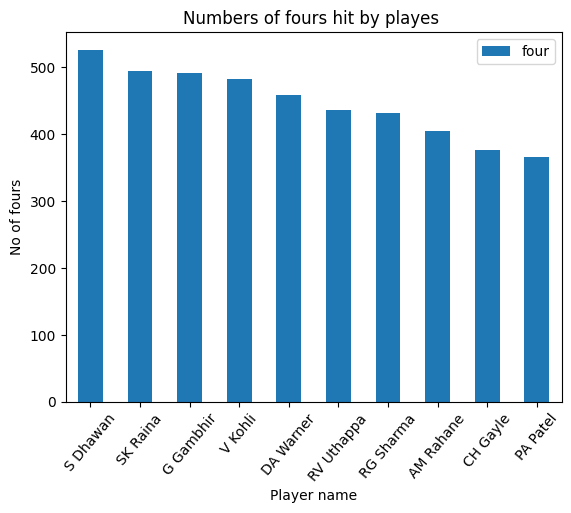

In [31]:
batsman_four=four_data.groupby('batsman')['batsman_runs'].agg([('four','count')]).reset_index().sort_values('four',ascending=0)
ax=batsman_four.iloc[:10,:].plot('batsman','four',kind='bar')
plt.title("Numbers of fours hit by playes ")
plt.xticks(rotation=50)
plt.xlabel("Player name")
plt.ylabel("No of fours")
plt.show()

#### no of four hit in each season

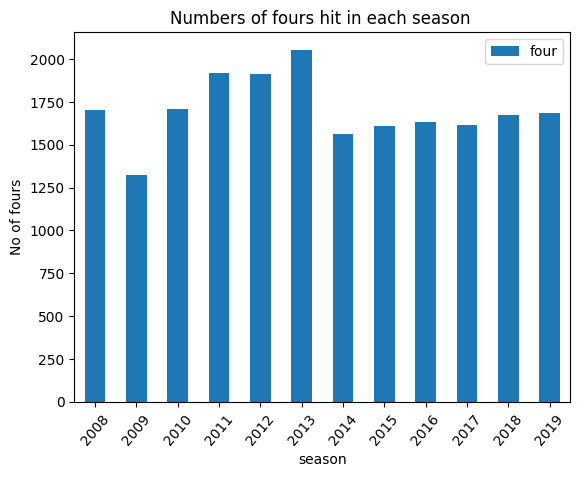

In [32]:
ax=four_data.groupby('season')['batsman_runs'].agg([('four','count')]).reset_index().plot('season','four',kind='bar')
plt.title("Numbers of fours hit in each season ")
plt.xticks(rotation=50)
plt.xlabel("season")
plt.ylabel("No of fours")
plt.show()


#### no of sixes hit by team

In [34]:
six_data=complete_data[complete_data['batsman_runs']==6]
six_data.groupby('batting_team')['batsman_runs'].agg([('runs by six','sum'),('sixes','count')])

,runs by six,sixes
batting_team,,
Chennai Super Kings,5838,973
Deccan Chargers,2400,400
Delhi Capitals,522,87
Delhi Daredevils,4806,801
Gujarat Lions,930,155
Kings XI Punjab,5856,976
Kochi Tuskers Kerala,318,53
Kolkata Knight Riders,5580,930
Mumbai Indians,6576,1096


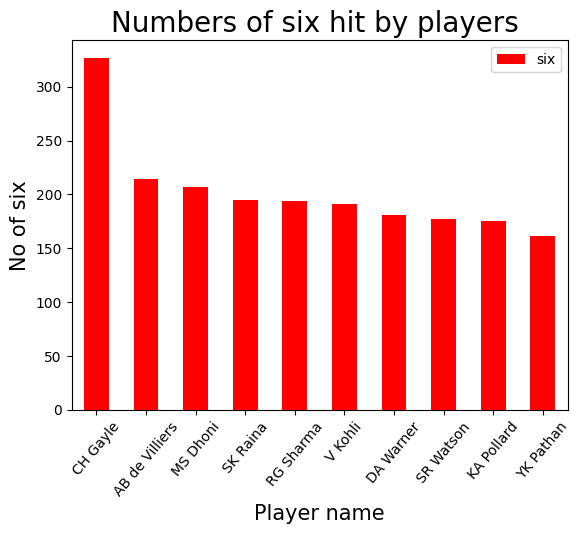

In [35]:
batsman_six=six_data.groupby('batsman')['batsman_runs'].agg([('six','count')]).reset_index().sort_values('six',ascending=0)
ax=batsman_six.iloc[:10,:].plot('batsman','six',kind='bar',color='red')
plt.title("Numbers of six hit by players ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Player name",fontsize=15)
plt.ylabel("No of six",fontsize=15)
plt.show()

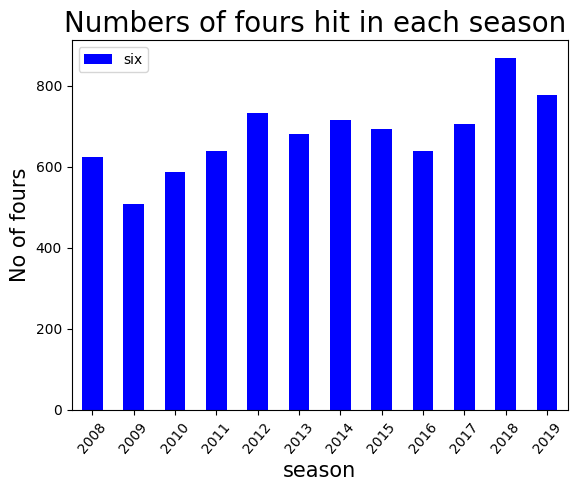

In [36]:
ax=six_data.groupby('season')['batsman_runs'].agg([('six','count')]).reset_index().plot('season','six',kind='bar',color = 'blue')
plt.title("Numbers of fours hit in each season ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("season",fontsize=15)
plt.ylabel("No of fours",fontsize=15)
plt.show()

### Top 10 Leading Run Scorer in IPL 

In [38]:
batsman_score=ddata.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True)
batsman_score=batsman_score.rename(columns={'sum':'batsman_runs'})
batsman_score.iloc[:10,:]

,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


#### no of matches played by batsman

In [39]:
No_Matches_player= ddata[["match_id","player_dismissed"]]
No_Matches_player =No_Matches_player .groupby("player_dismissed")["match_id"].count().reset_index().sort_values(by="match_id",ascending=False).reset_index(drop=True)
No_Matches_player.columns=["batsman","No_of Matches"]
No_Matches_player .head(5)

,batsman,No_of Matches
0,SK Raina,162
1,RG Sharma,155
2,RV Uthappa,153
3,V Kohli,143
4,S Dhawan,137


##### Dismissals / Wickets in IPL

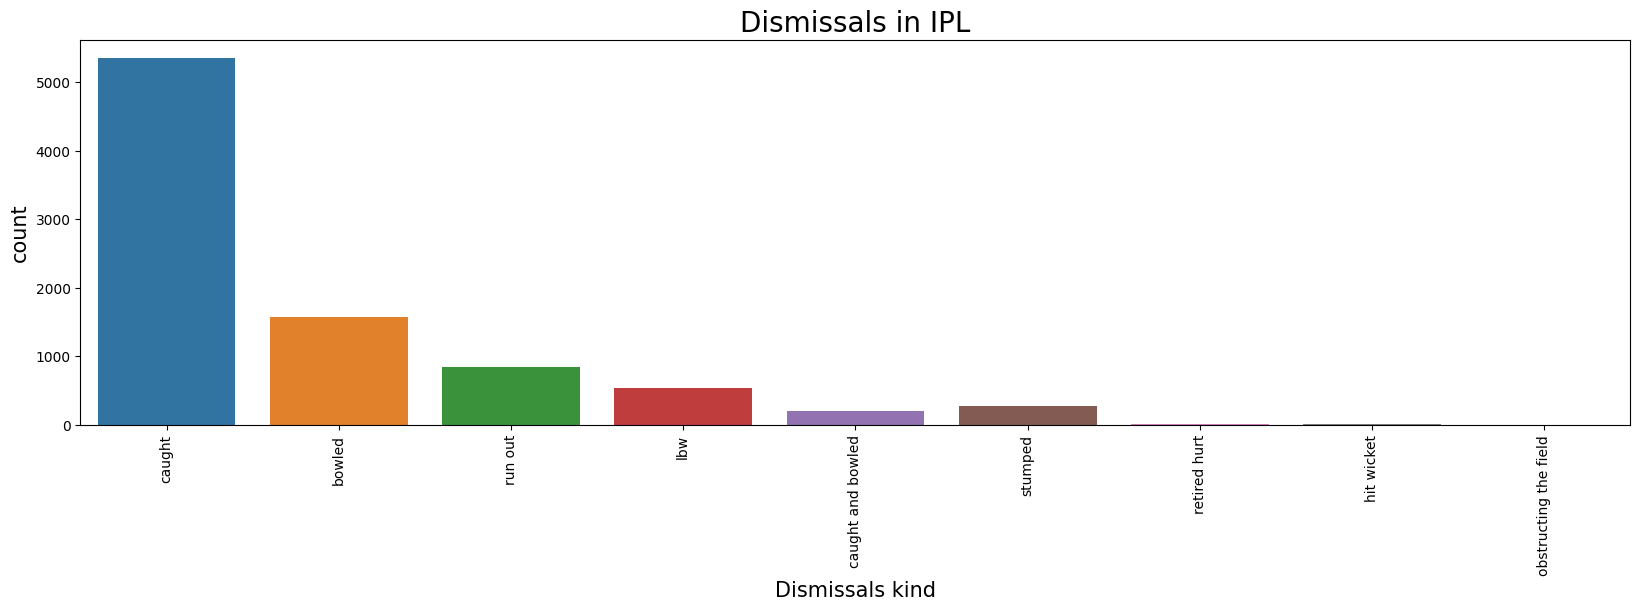

In [40]:
plt.figure(figsize=(20,5))
ax=sns.countplot(ddata.dismissal_kind)
plt.title("Dismissals in IPL",fontsize=20)
plt.xlabel("Dismissals kind",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [41]:
wicket_data=ddata.dropna(subset=['dismissal_kind'])
wicket_data=wicket_data[~wicket_data['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])]

####  most wicket taking bowlers

In [43]:
wicket_data.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',ascending=False).reset_index(drop=True).iloc[:10,:]

,bowler,count
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
5,B Kumar,133
6,R Ashwin,125
7,SP Narine,122
8,UT Yadav,119
9,RA Jadeja,108


## Conclusion

1. The highest number of match played in IPL season was 2013,2014,2015.

2. The highest number of match won by Mumbai Indians i.e 4 match out of 12 matches.

3. Teams which Bowl first has higher chances of winning then the team which bat first.

4. After winning toss more teams decide to do fielding first.

5. In finals teams which decide to do fielding first win the matches more then the team which bat first.

6. In finals most teams after winning toss decide to do fielding first.

7. Top player of match winning are CH gayle, AB de villers.

8. It is interesting that out of 12 IPL finals,9 times the team that won the toss was also the winner of IPL.

9. The highest number of four hit by player is Shikar Dhawan.

10. The highest number of six hit by player is CH gayle.

11. Top leading run scorer in IPL are Virat kholi, SK Raina, RG Sharma.

12. The highest number of matches played by player name are SK Raina, RG Sharma.

13. Dismissals in IPL was most by Catch out .

14. The IPL most wicket taken blower is SL Malinga.

# THANK YOU! 